In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
#columns = model_name,personality_1,personality_2,agent_1_scores,agent_2_scores,agent_1_messages,agent_2_messages,agent_1_actions,agent_2_actions,total_rounds
csv_path = "/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/experiment_250225.csv"
df = pd.read_csv(csv_path, converters={
    'agent_1_scores': lambda x: list(map(int, x.strip('[]').split(','))),
    'agent_2_scores': lambda x: list(map(int, x.strip('[]').split(','))),
    'total_rounds': int
})

df['agent_1_cumulative_scores'] = df['agent_1_scores'].apply(lambda x: [0] + list(pd.Series(x).cumsum()))
df['agent_2_cumulative_scores'] = df['agent_2_scores'].apply(lambda x: [0] + list(pd.Series(x).cumsum()))

# Calculate the average cost per round for each row
df['cost_per_round'] = df['total_cost_USD'] / df['total_rounds']

## projected cost

In [130]:
# Calculate the average cost per round across all rows
average_cost_per_round = df['cost_per_round'].mean()

# Calculate the predicted cost
predicted_cost = average_cost_per_round * 7 * 19 * 19 #all types with all types  with 10 rounds
actual_cost = df['total_cost_USD'].sum()
print(f"Predicted Cost: {predicted_cost}")
print(f"Actual Cost: {actual_cost}")

Predicted Cost: 1.9198819799999796
Actual Cost: 1.0104641999999893


## plot the final scores of each agent of each game

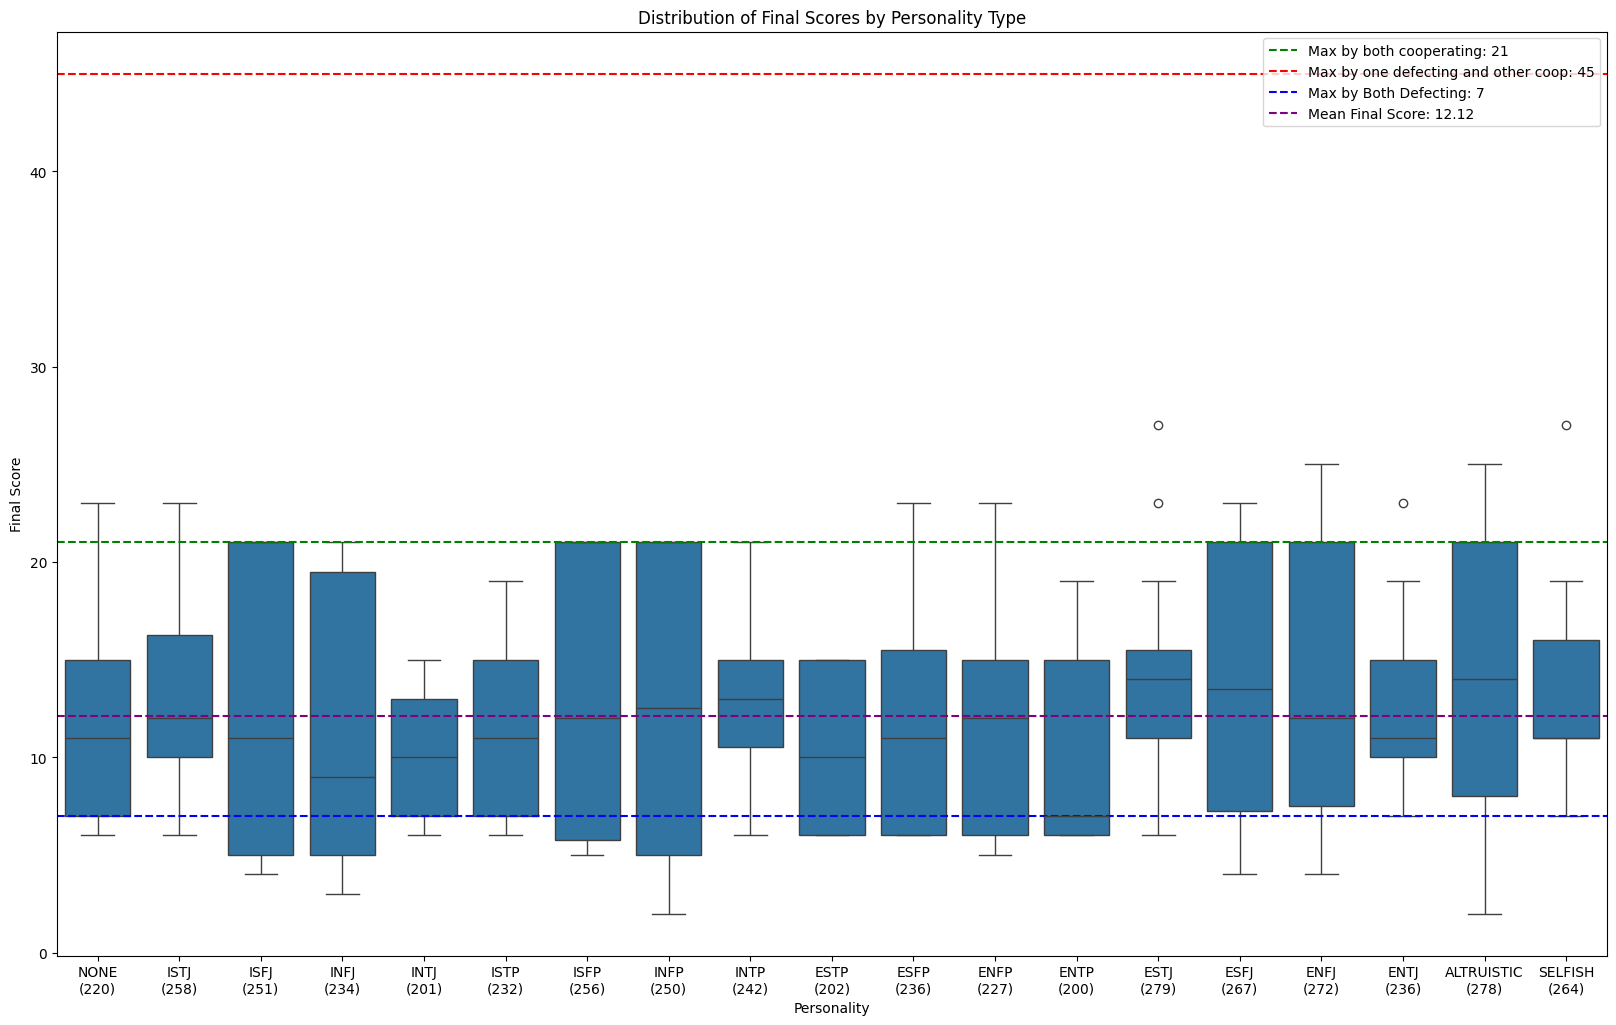

/tmp/ipykernel_923361/2344638581.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=final_scores_df, x='Personality', y='Final Score', inner='quartile', palette='Set3')


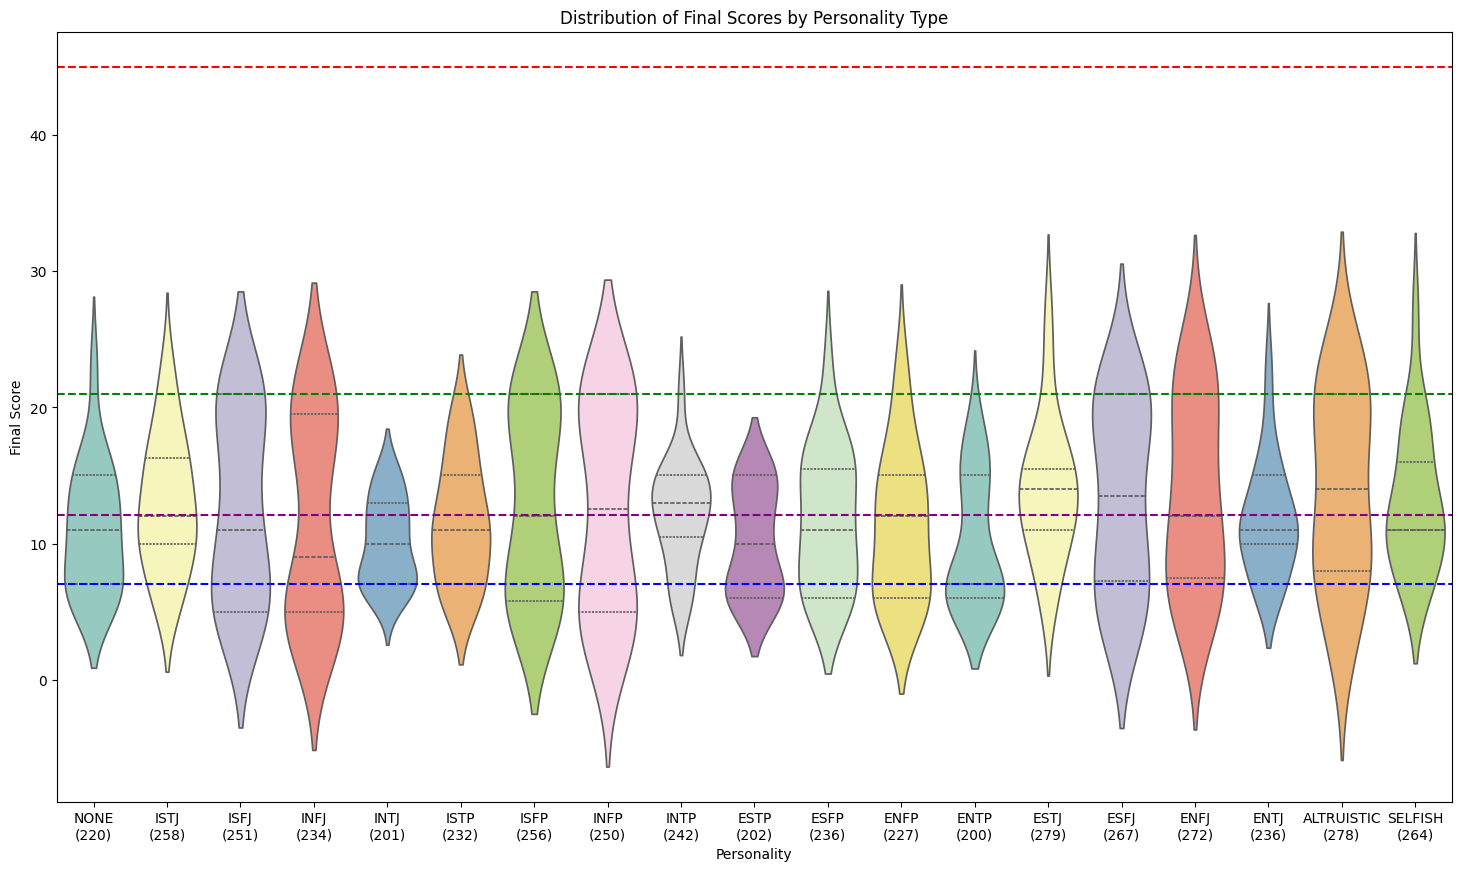

In [138]:
# Extract the final scores and personality types
final_scores = []
for i, row in df.iterrows():
    final_scores.append({'Personality': row['personality_1'], 'Final Score': row['agent_1_cumulative_scores'][-1]})
    final_scores.append({'Personality': row['personality_2'], 'Final Score': row['agent_2_cumulative_scores'][-1]})

# Create a DataFrame from the final scores
final_scores_df = pd.DataFrame(final_scores)
mean_final_score = final_scores_df['Final Score'].mean()

# Calculate total scores across all games for each personality
total_scores = final_scores_df.groupby('Personality')['Final Score'].sum().reset_index()
total_scores_dict = total_scores.set_index('Personality')['Final Score'].to_dict()

# Plot the distribution of final scores by personality type using box plot
plt.figure(figsize=(20, 12))
sns.boxplot(data=final_scores_df, x='Personality', y='Final Score')
plt.axhline(y=21, color='g', linestyle='--', label='Max by both cooperating: 21')
plt.axhline(y=45, color='r', linestyle='--', label='Max by one defecting and other coop: 45')
plt.axhline(y=7, color='b', linestyle='--', label='Max by Both Defecting: 7')
plt.axhline(y=mean_final_score, color='purple', linestyle='--', label=f'Mean Final Score: {mean_final_score:.2f}')
plt.legend()
plt.title('Distribution of Final Scores by Personality Type')

# Add total scores as x-tick labels
xticks_labels = [f"{personality}\n({total_scores_dict[personality]})" for personality in final_scores_df['Personality'].unique()]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels)

plt.xlabel('Personality')
plt.ylabel('Final Score')
plt.show()

# Plot the distribution of final scores by personality type using violin plot
plt.figure(figsize=(18, 10))
sns.violinplot(data=final_scores_df, x='Personality', y='Final Score', inner='quartile', palette='Set3')
plt.title('Distribution of Final Scores by Personality Type')

# Add total scores as x-tick labels
xticks_labels = [f"{personality}\n({total_scores_dict[personality]})" for personality in final_scores_df['Personality'].unique()]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels)

#add lines
plt.axhline(y=21, color='g', linestyle='--', label='Max by both cooperating: 21')
plt.axhline(y=45, color='r', linestyle='--', label='Max by one defecting and other coop: 45')
plt.axhline(y=7, color='b', linestyle='--', label='Max by Both Defecting: 7')
plt.axhline(y=mean_final_score, color='purple', linestyle='--', label=f'Mean Final Score: {mean_final_score:.2f}')

plt.xlabel('Personality')
plt.ylabel('Final Score')
plt.show()

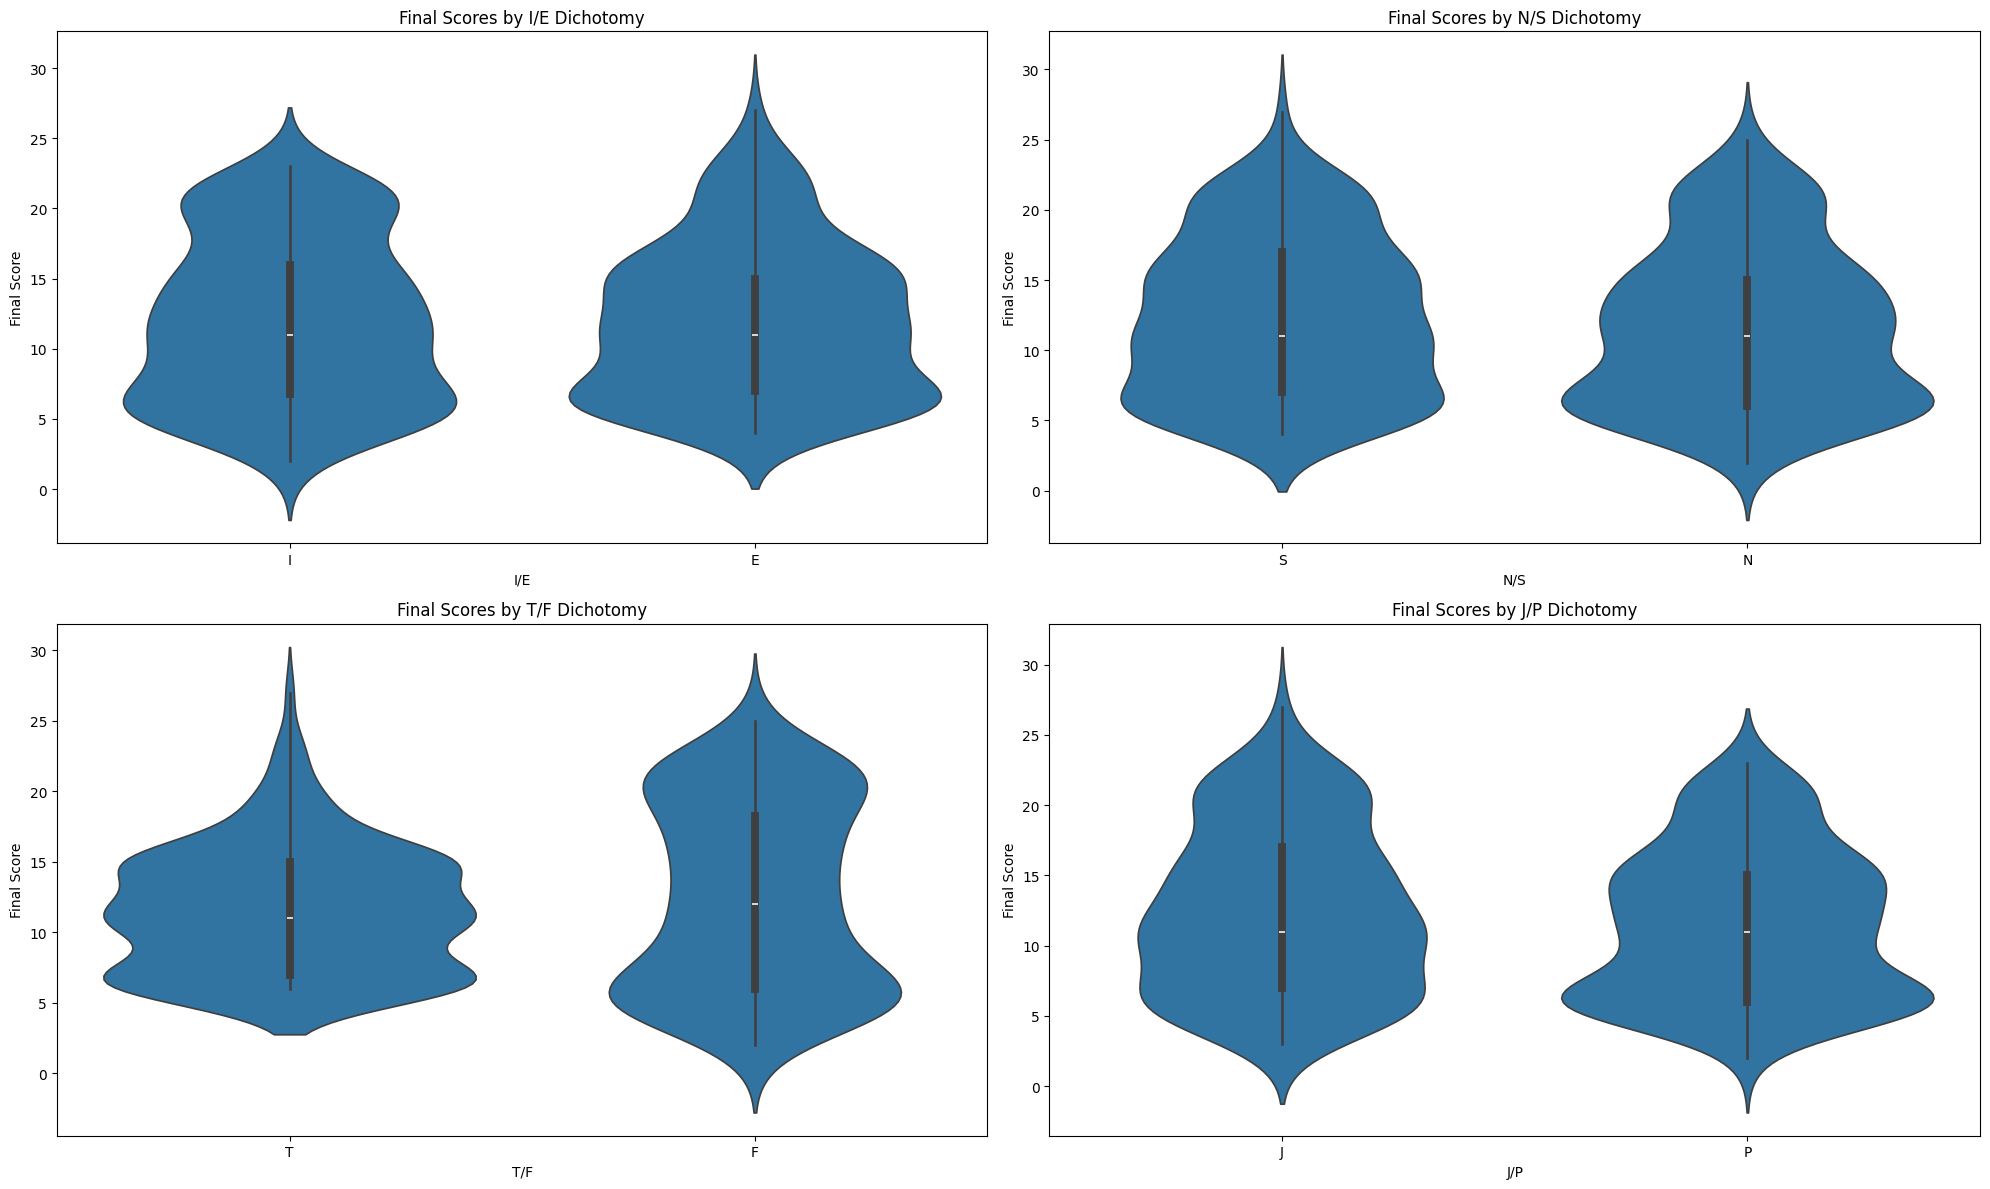

In [132]:
# Filter out the control groups
filtered_df = final_scores_df[~final_scores_df['Personality'].isin(['NONE', 'ALTRUISTIC', 'SELFISH'])]

# Create a new DataFrame to store the dichotomies
dichotomies_df = pd.DataFrame()

# Map each personality to its dichotomies
dichotomies_df['I/E'] = filtered_df['Personality'].apply(lambda x: 'I' if x[0] == 'I' else 'E')
dichotomies_df['N/S'] = filtered_df['Personality'].apply(lambda x: 'N' if x[1] == 'N' else 'S')
dichotomies_df['T/F'] = filtered_df['Personality'].apply(lambda x: 'T' if x[2] == 'T' else 'F')
dichotomies_df['J/P'] = filtered_df['Personality'].apply(lambda x: 'J' if x[3] == 'J' else 'P')
dichotomies_df['Final Score'] = filtered_df['Final Score']

# Plot the boxplots for each dichotomy
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.violinplot(data=dichotomies_df, x='I/E', y='Final Score')
plt.title('Final Scores by I/E Dichotomy')

plt.subplot(2, 2, 2)
sns.violinplot(data=dichotomies_df, x='N/S', y='Final Score')
plt.title('Final Scores by N/S Dichotomy')

plt.subplot(2, 2, 3)
sns.violinplot(data=dichotomies_df, x='T/F', y='Final Score')
plt.title('Final Scores by T/F Dichotomy')

plt.subplot(2, 2, 4)
sns.violinplot(data=dichotomies_df, x='J/P', y='Final Score')
plt.title('Final Scores by J/P Dichotomy')

plt.tight_layout()
plt.show()

## plot all cumulative scores against eachother

In [133]:
#for i, row in df.iterrows():
#    plt.figure()
#    agent_1_scores = row['agent_1_cumulative_scores']
#    agent_2_scores = row['agent_2_cumulative_scores']
#    plt.plot(range(len(agent_1_scores)), agent_1_scores, label='Agent 1 Cumulative Scores')
#    plt.plot(range(len(agent_2_scores)), agent_2_scores, label='Agent 2 Cumulative Scores')
#    plt.title(f"Model: {row['model_name']}, Personalities: {row['personality_1']} vs {row['personality_2']}")
#    plt.xlabel('Round')
#    plt.ylabel('Cumulative Score')
#    plt.legend()
#    plt.show()

## plot mean cummulative scores

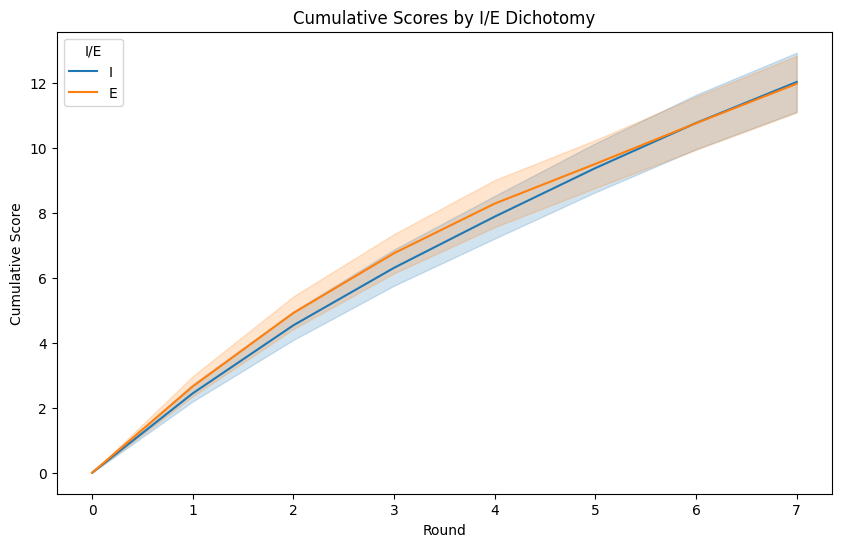

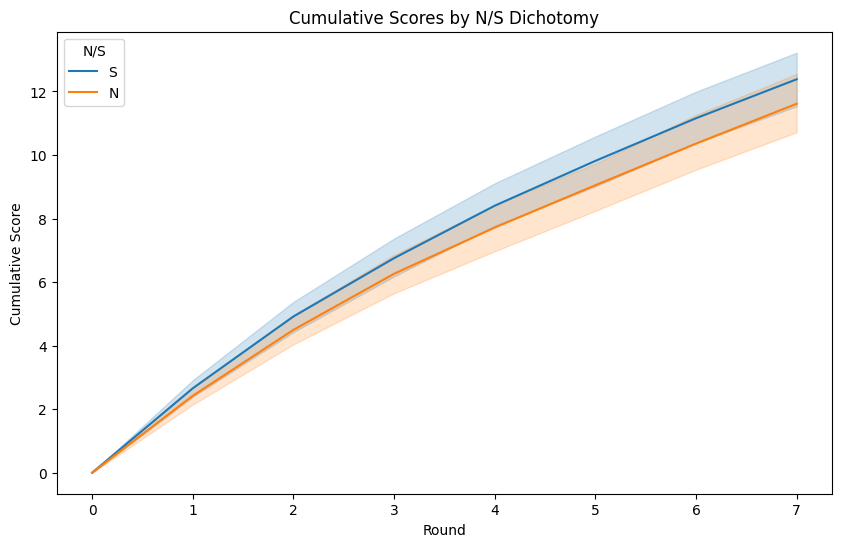

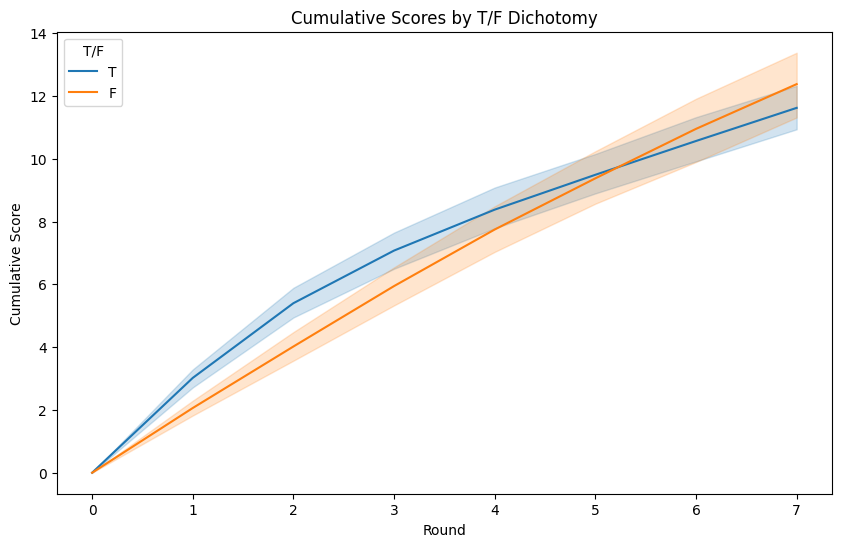

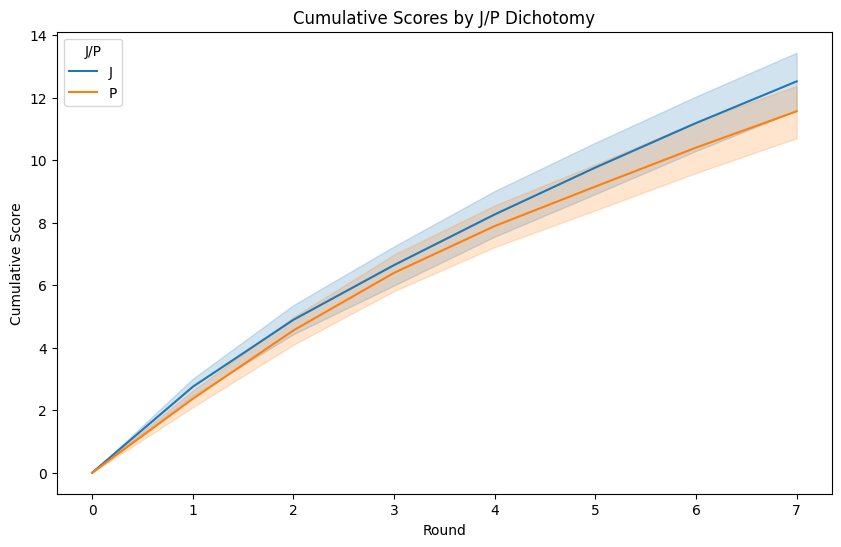

In [136]:
# Filter out the control groups
filtered_plot_df = plot_df[~plot_df['Personality'].isin(['NONE', 'ALTRUISTIC', 'SELFISH'])].copy()

# Map each personality to its dichotomies
filtered_plot_df.loc[:, 'I/E'] = filtered_plot_df['Personality'].apply(lambda x: 'I' if x[0] == 'I' else 'E')
filtered_plot_df.loc[:, 'N/S'] = filtered_plot_df['Personality'].apply(lambda x: 'N' if x[1] == 'N' else 'S')
filtered_plot_df.loc[:, 'T/F'] = filtered_plot_df['Personality'].apply(lambda x: 'T' if x[2] == 'T' else 'F')
filtered_plot_df.loc[:, 'J/P'] = filtered_plot_df['Personality'].apply(lambda x: 'J' if x[3] == 'J' else 'P')

# Plot the data for each dichotomy with error bars
dichotomies = ['I/E', 'N/S', 'T/F', 'J/P']
for dichotomy in dichotomies:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=filtered_plot_df, x='Round', y='Cumulative Score', hue=dichotomy)#, ci='sd')
    plt.title(f'Cumulative Scores by {dichotomy} Dichotomy')
    plt.xlabel('Round')
    plt.ylabel('Cumulative Score')
    plt.legend(title=dichotomy)
    plt.show()